In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [25]:
df= pd.read_csv('BankNote.csv')
df.head(55)

,variance,skewness,curtosis,entropy,class
0,3.621600,8.66610,-2.80730,-0.446990,0
1,4.545900,8.16740,-2.45860,-1.462100,0
2,3.866000,-2.63830,1.92420,0.106450,0
3,3.456600,9.52280,-4.01120,-3.594400,0
4,0.329240,-4.45520,4.57180,-0.988800,0
5,4.368400,9.67180,-3.96060,-3.162500,0
6,3.591200,3.01290,0.72888,0.564210,0
7,2.092200,-6.81000,8.46360,-0.602160,0
8,3.203200,5.75880,-0.75345,-0.612510,0
9,1.535600,9.17720,-2.27180,-0.735350,0


In [4]:
print(df.describe())

          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


In [5]:
df.shape

(1372, 5)

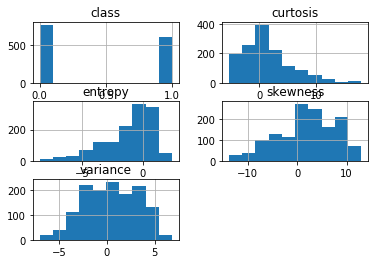

In [6]:
df.hist()
plt.show()

In [8]:
X= df[['variance', 'skewness', 'curtosis', 'entropy']]
Y= df['class']

In [9]:
from sklearn.preprocessing import LabelEncoder
X = X.astype('float32')

Y = LabelEncoder().fit_transform(Y)

In [10]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
X_train.shape

(1097, 4)

In [13]:
len(X_train.columns)

4

In [16]:
model = keras.Sequential([
     keras.layers.Dense(12, input_shape=(4,), activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=50)

Epoch 1/50
35/35 [==============================] - 1s 2ms/step - loss: 1.7465 - accuracy: 0.5880
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 1.3401 - accuracy: 0.6272
Epoch 3/50
35/35 [==============================] - 0s 2ms/step - loss: 1.0389 - accuracy: 0.6600
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.8023 - accuracy: 0.6964
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.6032 - accuracy: 0.7356
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.7767
Epoch 7/50
35/35 [==============================] - 0s 2ms/step - loss: 0.3423 - accuracy: 0.8396
Epoch 8/50
35/35 [==============================] - 0s 2ms/step - loss: 0.2792 - accuracy: 0.8861
Epoch 9/50
35/35 [==============================] - 0s 2ms/step - loss: 0.2402 - accuracy: 0.9098
Epoch 10/50
35/35 [==============================] - 0s 2ms/step - loss: 0.2135 - accuracy: 0.9170
Epoch 11/50
35/35 [

In [17]:
model.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 1.0000


[0.024498526006937027, 1.0]

In [18]:
X_train[:10]

,variance,skewness,curtosis,entropy
529,-1.38850,12.5026,0.691180,-7.548700
243,2.77440,6.8576,-1.067100,0.075416
1309,-4.28870,-7.8633,11.838700,-1.897800
664,5.35860,3.7557,-1.734500,1.078900
745,0.75736,3.0294,2.916400,-0.068117
1301,-3.72440,1.9037,-0.035421,-2.509500
746,4.64990,7.6336,-1.942700,-0.374580
873,-2.21730,1.4671,-0.726890,-1.172400
54,4.92640,5.4960,-2.477400,-0.506480
405,0.58982,7.4266,1.235300,-2.959500


In [19]:
yp = model.predict(X_test)
yp[:5]

array([[1.2429059e-03],
       [5.5981278e-02],
       [3.3023745e-02],
       [1.2060598e-06],
       [4.2030811e-03]], dtype=float32)

In [34]:
print(yp.mean())

0.45309612


In [35]:
y_pred = []
for element in yp:
    if element > 0.45309612:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [36]:
y_pred[:25]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1]

In [47]:
w1,w2,w3,w4= model.get_weights()

In [58]:
print(w1,w2,w3,w4)

[[-1.9246914   0.5732207   0.17197607  1.1270701   0.4875333   0.5153485
  -0.35331818 -0.33735156 -0.57730347  0.1201503  -0.25372025 -0.73856664]
 [-0.25166947  0.32066733  0.9408856  -0.79499143 -0.75554657  0.03869837
   0.4334048   0.4415936  -0.10538311 -0.03596521  0.75141984 -0.8002596 ]
 [-0.09607437  0.48512873 -0.40754864 -0.14565101 -0.07228214  0.784357
  -0.48897707  1.2499436   0.984651   -0.43116274 -1.736251   -0.72212595]
 [ 0.48797417 -0.5090547   0.33402228  0.10015399  0.68227345 -0.12529452
  -0.85411584 -0.21823306  1.5794324  -1.2765712  -0.39196742 -0.8295625 ]] [ 1.0251514   0.19415729 -0.44699162 -0.39264578 -0.0964286   0.30277264
 -0.521719   -0.14228353 -0.14819722  0.14087705  0.7254594   0.8048576 ] [[ 0.6551118 ]
 [-1.1758116 ]
 [-0.61794364]
 [-0.13927801]
 [ 0.26277775]
 [-0.6074908 ]
 [-0.36474082]
 [-0.03688918]
 [ 0.30092838]
 [ 0.30762503]
 [ 0.4320652 ]
 [ 0.97303224]] [0.11252304]
